In [5]:
from main import main
import pandas as pd 
from sklearn.metrics import adjusted_rand_score , silhouette_score , normalized_mutual_info_score ,fowlkes_mallows_score
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def plot(file_path):
    data = pd.read_csv(file_path)
    
    plt.figure(figsize = (6,6))
    sns.scatterplot(data = data , 
                    x = "x" , 
                    y = "y" , 
                    hue = "label",
                    # hue_order = ['A' , 'B' , 'C'],
                    palette = 'muted')
    plt.title("Spatial Distributions of Groups")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(title = "Group")
    plt.show()
    
def evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False):
    truth_data = pd.read_csv(coordinate_file_truth)
    pred_data = pd.read_csv(coordinate_file_pred)
    
    ARI = adjusted_rand_score(truth_data['group'] , pred_data['group'])
    NMI = normalized_mutual_info_score(truth_data['group'], pred_data['group'])
    Silhouette = silhouette_score(pred_data[['x', 'y']], pred_data['group'])
    FMI = fowlkes_mallows_score(truth_data['group'], pred_data['group'])
    SGD = main(coordinate_file_truth , coordinate_file_pred ,apply_gene_similarity = apply_gene_similarity , apply_AD_weight=apply_AD_weight , is_subtying = False)
    return {
        "ARI":ARI , 
        "NMI":NMI ,
        "Silhouette Coefficient":Silhouette,
        "FMI":FMI,
        "SGD":SGD
    }

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
coordinate_file_truth = "data/Real_case/Real_case/Truth.csv"
coordinate_file_pred = "data/Real_case/Real_case/FP.csv"

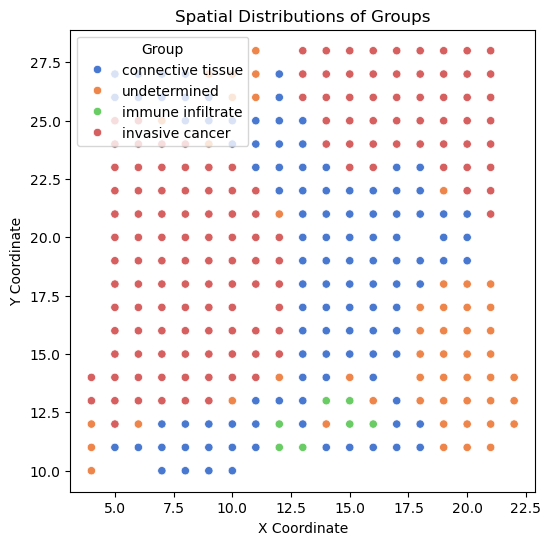

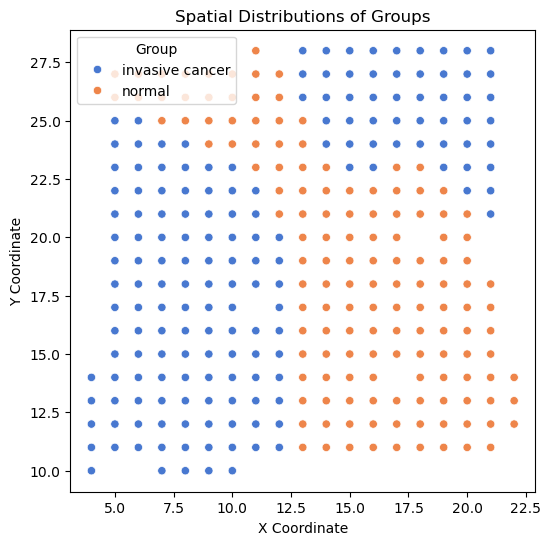

In [7]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = True)

In [8]:
coordinate_file_truth = "data/Real_case/Real_case/Truth.csv"
coordinate_file_pred = "data/Real_case/Real_case/FN.csv"

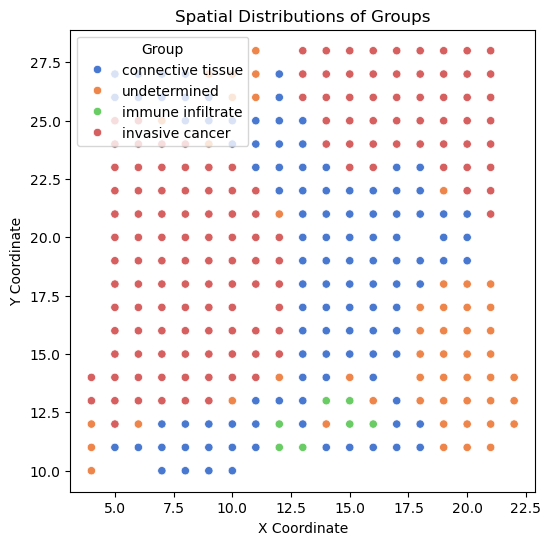

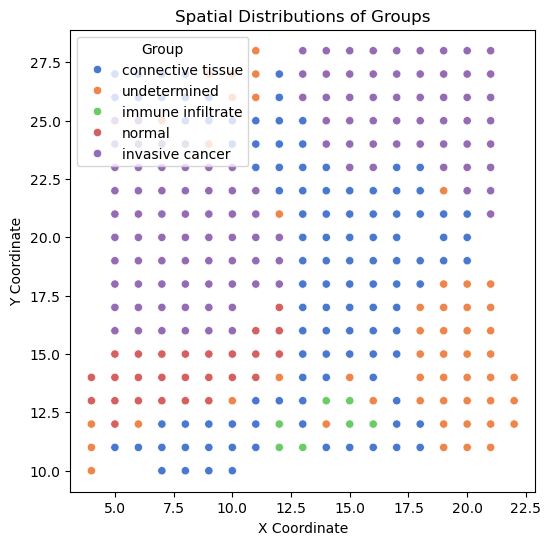

In [9]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)